In [1]:
!pip install ipympl

Defaulting to user installation because normal site-packages is not writeable


In [69]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import statsmodels.api as sm
import pickle as pkl
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from mpl_toolkits.mplot3d import Axes3D
%matplotlib widget

# Students : 
### - Sahar Jerbi - 206775603
### - Maxim Polak - 209383322
### - David Moshe Zohar - 209160977
### - Daniel Gross - 208328161

In [70]:
df = pkl.load( open('../Final Project/project_part_1_group_18.pkl', 'rb'))
df.head()

,Intercept,temp,rigid_left__c,is_mathane
0,1.0,41.709126,True,False
1,1.0,41.880191,False,True
2,1.0,17.099422,False,False
3,1.0,25.619566,False,True
4,1.0,44.750792,True,False


In [71]:
df.shape

(120, 4)

In [72]:
df.isna().sum()

Intercept        0
temp             0
rigid_left__c    0
is_mathane       0
dtype: int64

In [73]:
df['is_mathane'] = df['is_mathane'].astype(int)
df['rigid_left__c'] = df['rigid_left__c'].astype(int)
df.head()

,Intercept,temp,rigid_left__c,is_mathane
0,1.0,41.709126,1,0
1,1.0,41.880191,0,1
2,1.0,17.099422,0,0
3,1.0,25.619566,0,1
4,1.0,44.750792,1,0


---

# PART 1
# Q1 :

In [74]:
x = df[['Intercept', 'temp', 'rigid_left__c']]
y = df['is_mathane']

In [75]:
Logistic_Model = sm.Logit(y,x)
OurModel = Logistic_Model.fit()
print(OurModel.summary())

Optimization terminated successfully.
         Current function value: 0.500576
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:             is_mathane   No. Observations:                  120
Model:                          Logit   Df Residuals:                      117
Method:                           MLE   Df Model:                            2
Date:                Mon, 12 Aug 2024   Pseudo R-squ.:                  0.2630
Time:                        22:19:16   Log-Likelihood:                -60.069
converged:                       True   LL-Null:                       -81.503
Covariance Type:            nonrobust   LLR p-value:                 4.912e-10
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         3.1465      0.757      4.158      0.000       1.663       4.630
temp             -0.

In [76]:
OurModel_aic , OurModel_bic = OurModel.aic , OurModel.bic

In [77]:
print('AIC =',OurModel_aic)
print('BIC =',OurModel_bic)

AIC = 126.13814529142662
BIC = 134.50062051977275


### Logistic regression equation: 
$$
P(\text{Is_Mathane}) = \frac{1}{1+e^{-(3.1465 + (-0.0801) \cdot \text{temp} + (-2.3809) \cdot \text{rigid_left__c})}} 
$$
---
---

# Q2

In [78]:
df['prediction'] = OurModel.predict(df[['Intercept', 'temp', 'rigid_left__c']])
df.head()

,Intercept,temp,rigid_left__c,is_mathane,prediction
0,1.0,41.709126,1,0,0.070741
1,1.0,41.880191,0,1,0.448149
2,1.0,17.099422,0,0,0.855306
3,1.0,25.619566,0,1,0.749201
4,1.0,44.750792,1,0,0.056306


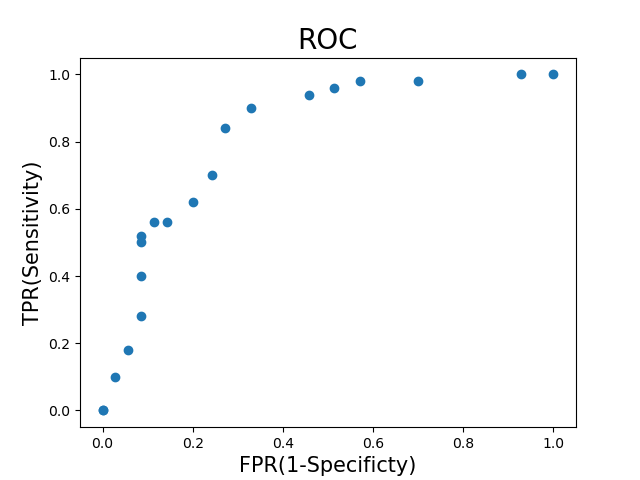

In [79]:
fprs = []
sensi = []
thresholds = np.linspace(0,1,20)

for threshold in thresholds:

    df['classification'] = df['prediction'].apply(lambda x: 1 if x > threshold else 0)

    y_pred = df['classification']
    y = df['is_mathane']
    confusion_matrix_ = confusion_matrix(y, y_pred)


    sensitivity_ = confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1])
    specificty_ = confusion_matrix_[0,0]/(confusion_matrix_[0,1]+confusion_matrix_[0,0])
    fpr = 1-specificty_
    
    fprs.append(fpr)
    sensi.append(sensitivity_)

plt.figure()
plt.scatter( fprs, sensi)
plt.xlabel('FPR(1-Specificty)', fontsize = 15)
plt.ylabel('TPR(Sensitivity)', fontsize = 15)
plt.title('ROC', fontsize = 20)
plt.show()

In [80]:
thresholds

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

## We can see here that the threshold that will give us Sensitivity and Specificty above 0.6 will be somewhere between 0.315 to 0.473 but we will do some manual tests to get the specific answer

In [81]:
logreg = LogisticRegression()
logreg.fit( df[['Intercept', 'temp', 'rigid_left__c']], df['is_mathane'])

LogisticRegression()

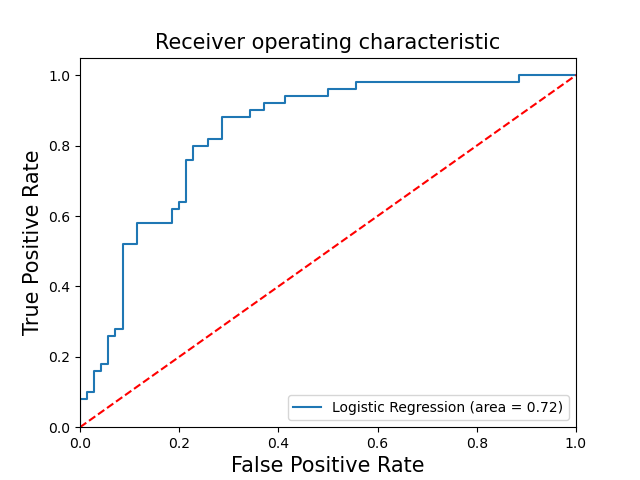

In [82]:
logit_roc_auc = roc_auc_score(df['is_mathane'], logreg.predict(df[['Intercept', 'temp', 'rigid_left__c']]))
fpr, tpr, thresholds = roc_curve(df['is_mathane'], logreg.predict_proba(df[['Intercept', 'temp', 'rigid_left__c']])[:,1])

plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize = 15)
plt.ylabel('True Positive Rate', fontsize = 15)
plt.title('Receiver operating characteristic', fontsize = 15)
plt.legend(loc="lower right")
plt.show()

In [83]:
data_predict = df[['Intercept', 'temp' ,'rigid_left__c']]

In [84]:
TP = sum((OurModel.predict(data_predict) > 0.3) & (df["is_mathane"] == 1))
FP = sum((OurModel.predict(data_predict) > 0.3) & (df["is_mathane"] == 0))
TN = sum((OurModel.predict(data_predict) <= 0.3) & (df["is_mathane"] == 0))
FN = sum((OurModel.predict(data_predict) <= 0.3) & (df["is_mathane"] == 1))
TP,FP,TN,FN

(46, 26, 44, 4)

In [85]:
threshold = 0.3
df['classification'] = df['prediction'].apply(lambda x: 1 if x > threshold else 0)
y_pred = df['classification']
y = df['is_mathane']
confusion_matrix_ = confusion_matrix(y, y_pred)
sensitivity_ = confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1])
specificty_ = confusion_matrix_[0,0]/(confusion_matrix_[0,1]+confusion_matrix_[0,0])
fpr = 1- specificty_
sensitivity_,specificty_, fpr

(0.92, 0.6285714285714286, 0.37142857142857144)

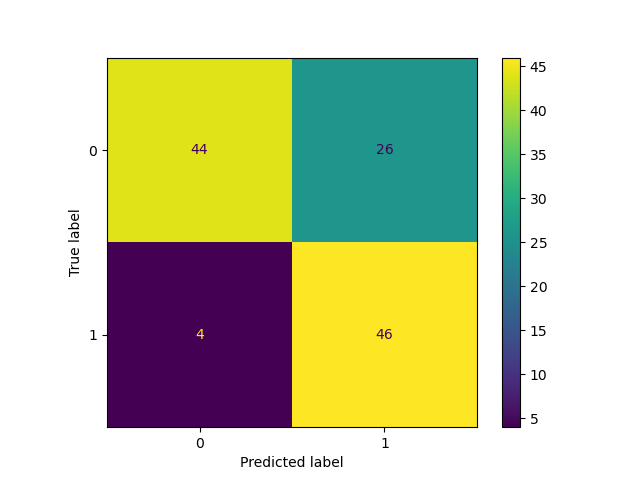

In [86]:
cm = confusion_matrix(df['is_mathane'], df['classification'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=np.array([0,1]))
disp.plot()
plt.show()

In [87]:
TP = sum((OurModel.predict(data_predict) > 0.48) & (df["is_mathane"] == 1))
FP = sum((OurModel.predict(data_predict) > 0.48) & (df["is_mathane"] == 0))
TN = sum((OurModel.predict(data_predict) <= 0.48) & (df["is_mathane"] == 0))
FN = sum((OurModel.predict(data_predict) <= 0.48) & (df["is_mathane"] == 1))
TP,FP,TN,FN

(31, 13, 57, 19)

In [88]:
threshold = 0.48
df['classification'] = df['prediction'].apply(lambda x: 1 if x > threshold else 0)
y_pred = df['classification']
y = df['is_mathane']
confusion_matrix_ = confusion_matrix(y, y_pred)
sensitivity_ = confusion_matrix_[1,1]/(confusion_matrix_[1,0]+confusion_matrix_[1,1])
specificty_ = confusion_matrix_[0,0]/(confusion_matrix_[0,1]+confusion_matrix_[0,0])
fpr = 1- specificty_
sensitivity_,specificty_, fpr

(0.62, 0.8142857142857143, 0.18571428571428572)

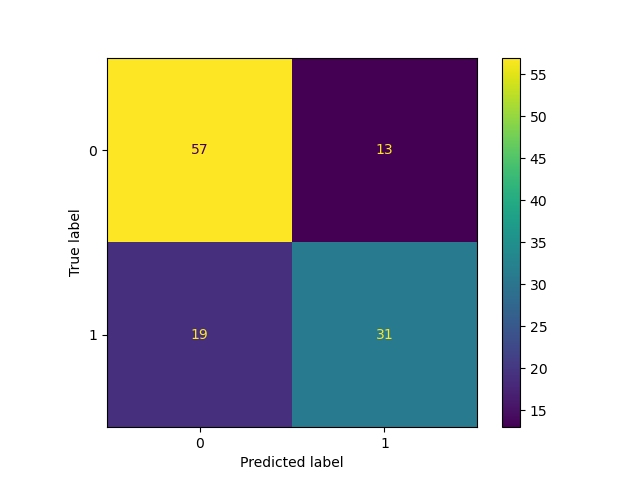

In [89]:
cm = confusion_matrix(df['is_mathane'], df['classification'])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=np.array([0,1]))
disp.plot()
plt.show()

## After a few manual tests we found the threshold range and it is between 0.3 to 0.48

---

# Q3

In [90]:
def calculate_metrics(y_true, y_pred, threshold):
    y_pred_thresholded = (y_pred >= threshold).astype(int)
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred_thresholded).ravel()
    accuracy = (tp + tn) / (tp + tn + fp + fn)
    return accuracy

def find_optimal_threshold(y_true, y_pred, min_threshold=0.01, max_threshold=0.99, step=0.01):
    best_accuracy = 0
    optimal_thresholds = []
    
    for threshold in np.arange(min_threshold, max_threshold, step):
        accuracy = calculate_metrics(y_true, y_pred, threshold)
        if accuracy > best_accuracy:
            best_accuracy = accuracy
            optimal_thresholds = [threshold]
        elif accuracy == best_accuracy:
            optimal_thresholds.append(threshold)
    
    return best_accuracy, optimal_thresholds

y_true = df['is_mathane']
y_pred = df['prediction']

best_accuracy, optimal_thresholds = find_optimal_threshold(y_true, y_pred)
print(f"Best Accuracy: {best_accuracy}")
print(f"Optimal Thresholds: {optimal_thresholds}")

Best Accuracy: 0.7833333333333333
Optimal Thresholds: [0.34, 0.35000000000000003, 0.38, 0.39]


### The best accuracy is 0.7833333333333333
### The Threshold values for that accuracy is : 0.34, 0.35000000000000003, 0.38, 0.39

# The predictions

In [91]:
pred_df = pd.DataFrame([])
pred_df.loc[0,'Intercept'] = 1
pred_df.loc[0,'temp'] = 25.5
pred_df.loc[0,'rigid_left__c'] = 1
pred_df.loc[1,'Intercept'] = 1
pred_df.loc[1,'temp'] = 26.5
pred_df.loc[1,'rigid_left__c'] = 1
pred_df.loc[2,'Intercept'] = 1
pred_df.loc[2,'temp'] = 27.5
pred_df.loc[2,'rigid_left__c'] = 1
pred_df.head()

,Intercept,temp,rigid_left__c
0,1.0,25.5,1.0
1,1.0,26.5,1.0
2,1.0,27.5,1.0


In [92]:
is_mathane_prob_a = OurModel.predict(pred_df[['Intercept', 'temp', 'rigid_left__c']])
is_mathane_prob_a

0    0.218064
1    0.204715
2    0.191982
dtype: float64

### a.

In [93]:
is_mathane_prob_a[0]

0.21806446969071108

### The probability that it will be a methane when the temperature is 25.5 and there is some lumps is : 0.21806446969071108
---

### b.

In [94]:
is_mathane_prob_a[1]

0.20471473340072133

### The probability that it will be a methane when the temperature is 26.5 and there is some lumps is : 0.20471473340072133
---

### c.

In [95]:
is_mathane_prob_a[2]

0.1919816029214187

### The probability that it will be a methane when the temperature is 27.5 and there is some lumps is : 0.1919816029214187
---

# Q4

In [96]:
Odds_a = is_mathane_prob_a[0] / (1-is_mathane_prob_a[0])
Odds_b = is_mathane_prob_a[1] / (1-is_mathane_prob_a[1])
Odds_c = is_mathane_prob_a[2] / (1-is_mathane_prob_a[2])

In [97]:
np.log(Odds_b / Odds_a)

-0.08010186705609001

In [98]:
np.log(Odds_c / Odds_b)

-0.08010186705609001

In [99]:
np.log(Odds_c / Odds_a)

-0.16020373411218003

## As we can see , the log odds ratio between B and A and between C and B is equal and is similar to the temperature parameter. Thats because the difference between them is only with the temperature that is $1^\circ$ (they both have lumps).
## Log odds ratio between C and B and between B and A = 1*temp 
## We can see aswell that the different between them and the log odds ratio between C and A is double the temperature parameter and that because the interval between C and A is double then between C and B and between B and A ($2^\circ$).
## Log odds ratio between C and A = 2*temp 
---

# PART 2

In [100]:
df1 = pkl.load( open('../Final Project/project_part_2_group_18.pkl', 'rb'))
df1.head()

,Intercept,age,safety_guidence_score,factory__c,chemical__c,time_in_factory,num_accidents
0,1.0,44,0,Toronto,Sulfuric_Acid,1,0
1,1.0,35,4,Vancouver,Sulfuric_Acid,3,6
2,1.0,24,10,Toronto,Sulfuric_Acid,3,0
3,1.0,36,2,Vancouver,Sulfuric_Acid,8,2
4,1.0,29,8,Toronto,Sulfuric_Acid,5,0


# Q1 :

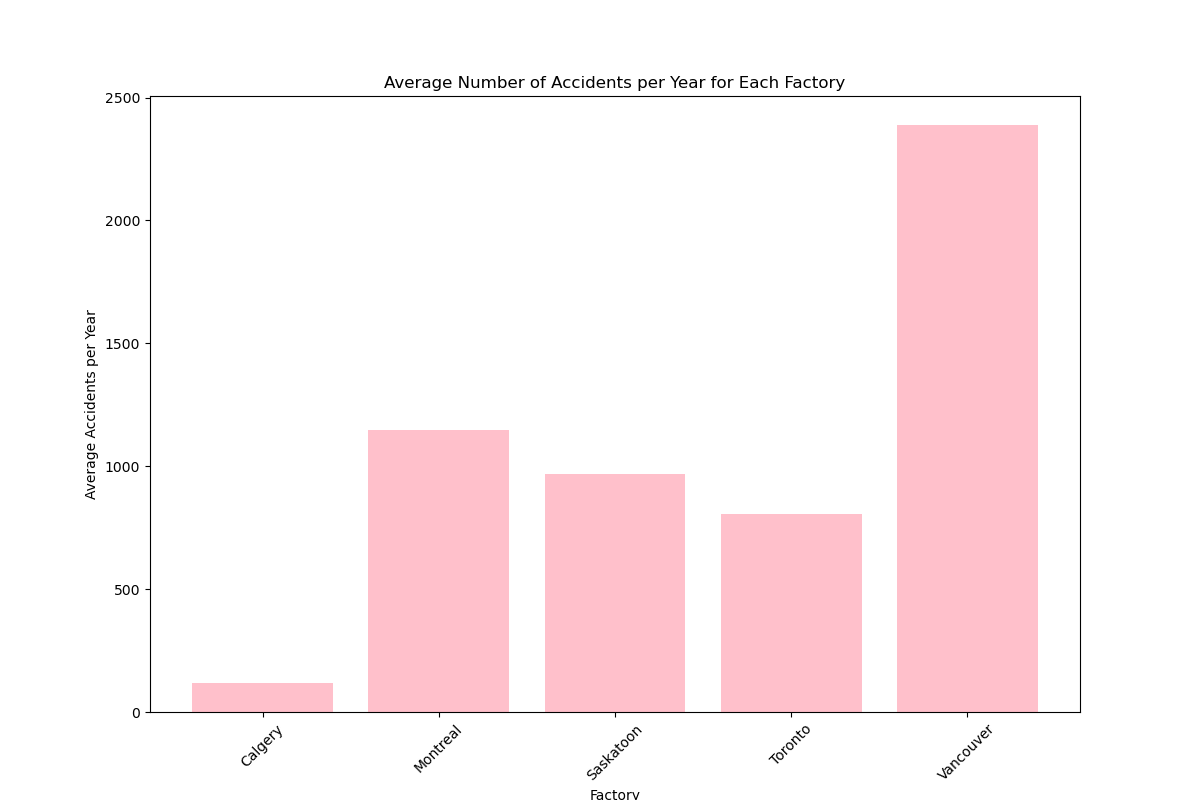

In [101]:
df1['avg_accidents_per_year'] = df1['num_accidents'] / df1['time_in_factory']
average_accidents_per_factory = df1.groupby('factory__c')['avg_accidents_per_year'].sum().reset_index()
plt.figure(figsize=(12,8))
plt.bar(average_accidents_per_factory['factory__c'], average_accidents_per_factory['avg_accidents_per_year'], color='Pink')
plt.xlabel('Factory')
plt.ylabel('Average Accidents per Year')
plt.title('Average Number of Accidents per Year for Each Factory')
plt.xticks(rotation=45)
plt.show()

### It seems that the average number of accidents per year varies greatly between factories. Therefore, it can be assumed that the factory's location has an impact on the number of accidents. As a result, it is likely that the variable 'factory__c' will be significant.
---

# Q2 :

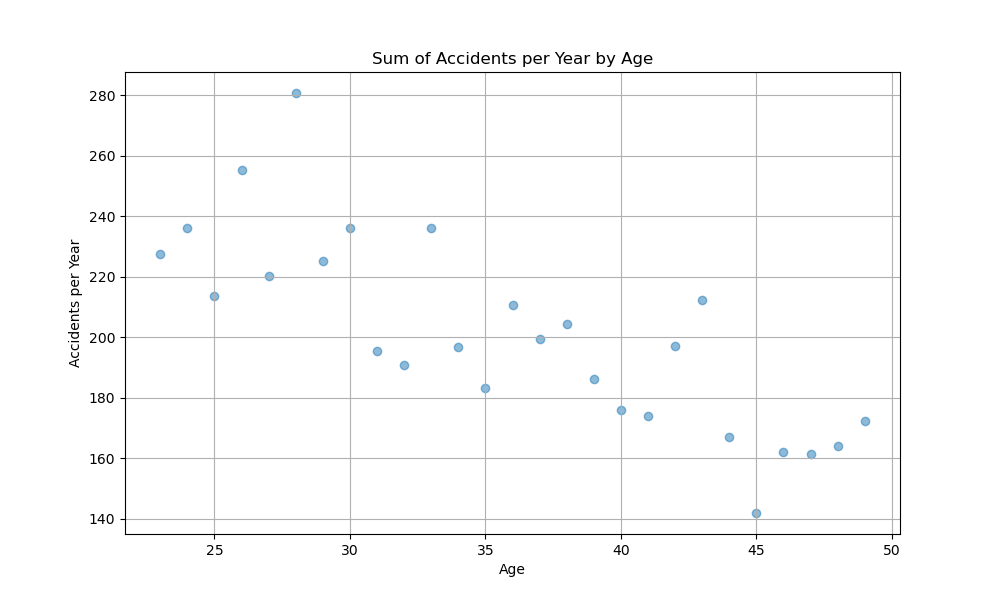

In [102]:
mean_accidents_per_year_by_age = df1.groupby('age')['avg_accidents_per_year'].sum().reset_index()
plt.figure(figsize=(10, 6))
plt.scatter(mean_accidents_per_year_by_age['age'], mean_accidents_per_year_by_age['avg_accidents_per_year'], alpha=0.5)
plt.xlabel('Age')
plt.ylabel('Accidents per Year')
plt.title('Sum of Accidents per Year by Age')
plt.grid(True)
plt.show()

### It seems there is a connection between the worker's age and the number of accidents. The connection appears to be negative, meaning that as the worker's age increases, the number of accidents decreases. Therefore, the sign in the equation will be negative (-) .
---


# Q3

In [103]:
dummy_factory = pd.get_dummies(df1['factory__c'])
df1 = pd.concat([df1 ,dummy_factory], axis=1)
df1.drop('Toronto', axis=1, inplace=True)

In [104]:
dummy_chemical = pd.get_dummies(df1['chemical__c'])
df1 = pd.concat([df1, dummy_chemical], axis=1)
df1.drop('Methane', axis=1, inplace=True)

In [105]:
df1.head()

,Intercept,age,safety_guidence_score,factory__c,chemical__c,time_in_factory,num_accidents,avg_accidents_per_year,Calgery,Montreal,Saskatoon,Vancouver,Sulfuric_Acid
0,1.0,44,0,Toronto,Sulfuric_Acid,1,0,0.00,0,0,0,0,1
1,1.0,35,4,Vancouver,Sulfuric_Acid,3,6,2.00,0,0,0,1,1
2,1.0,24,10,Toronto,Sulfuric_Acid,3,0,0.00,0,0,0,0,1
3,1.0,36,2,Vancouver,Sulfuric_Acid,8,2,0.25,0,0,0,1,1
4,1.0,29,8,Toronto,Sulfuric_Acid,5,0,0.00,0,0,0,0,1


In [106]:
model_poisson = sm.GLM(df1['num_accidents'], df1[['Intercept', 'age' ,'safety_guidence_score','Calgery','Montreal','Saskatoon','Vancouver','Sulfuric_Acid']], family=sm.families.Poisson(), offset=np.log(df1['time_in_factory']))
results_poisson = model_poisson.fit()
print(results_poisson.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_accidents   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9992
Model Family:                 Poisson   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24860.
Date:                Mon, 12 Aug 2024   Deviance:                       28561.
Time:                        22:19:22   Pearson chi2:                 3.39e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1076
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.10

### As we can see there are non-significant variables and we need to drop them.

### So the new regresion will be :

In [107]:
model_poisson1 = sm.GLM(df1['num_accidents'], df1[['Intercept', 'age' ,'safety_guidence_score','Vancouver']], family=sm.families.Poisson(), offset=np.log(df1['time_in_factory']))
results_poisson1 = model_poisson1.fit()
print(results_poisson1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_accidents   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9996
Model Family:                 Poisson   Df Model:                            3
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -24862.
Date:                Mon, 12 Aug 2024   Deviance:                       28564.
Time:                        22:19:23   Pearson chi2:                 3.39e+04
No. Iterations:                     5   Pseudo R-squ. (CS):             0.1074
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.11

### Poisson regression equation: 
$$
E[y_i] =  (\text{time_in_factory})_i \cdot e^{-0.1151 -0.0191 \cdot \text{age} + 0.0093 \cdot \text{safety_guidance_score} + 0.2614 \cdot \text{Vancouver}}
$$
---
---

# Q4

### First Check :

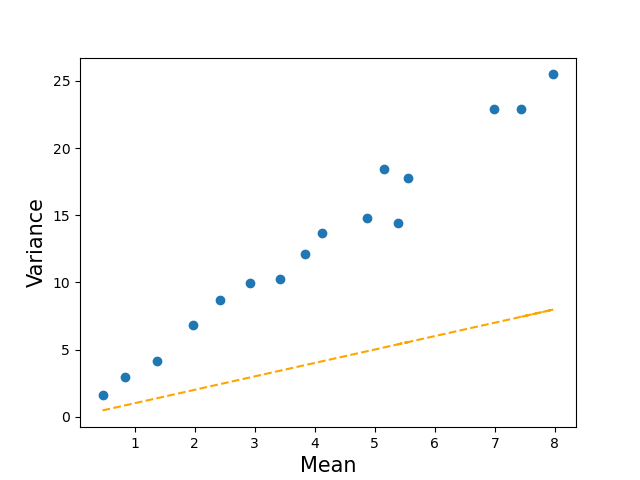

In [108]:
X = df1[['Intercept', 'age' ,'safety_guidence_score','Calgery','Montreal','Saskatoon','Vancouver','Sulfuric_Acid']]
y = df1['num_accidents']
df_pois = pd.concat((X, y), axis =1)
df_pois['predicted'] = results_poisson1.fittedvalues
lams = np.linspace(0,15, 30)

means = []
vars_ = []

for lams_ind in range(lams.shape[0]-1):
    
    lb = lams[lams_ind]
    ub = lams[lams_ind+1]
        
    shape = df_pois.loc[(df_pois['predicted']>lb)& (df_pois['predicted']<ub), 'num_accidents'].shape
    var = df_pois.loc[(df_pois['predicted']>lb)& (df_pois['predicted']<ub), 'num_accidents'].std()**2
    mean = df_pois.loc[(df_pois['predicted']>lb)& (df_pois['predicted']<ub), 'num_accidents'].mean()
    
    if shape[0] > 10:
        means.append(mean)
        vars_.append(var)
    
plt.figure()
plt.scatter(means, vars_)
plt.plot(means, means, '--', label='y = x', color = 'orange')
plt.xlabel('Mean', fontsize = 15)
plt.ylabel('Variance', fontsize = 15)
plt.show()

#### We can see that the Variance is higher then the Mean

### Second Check :

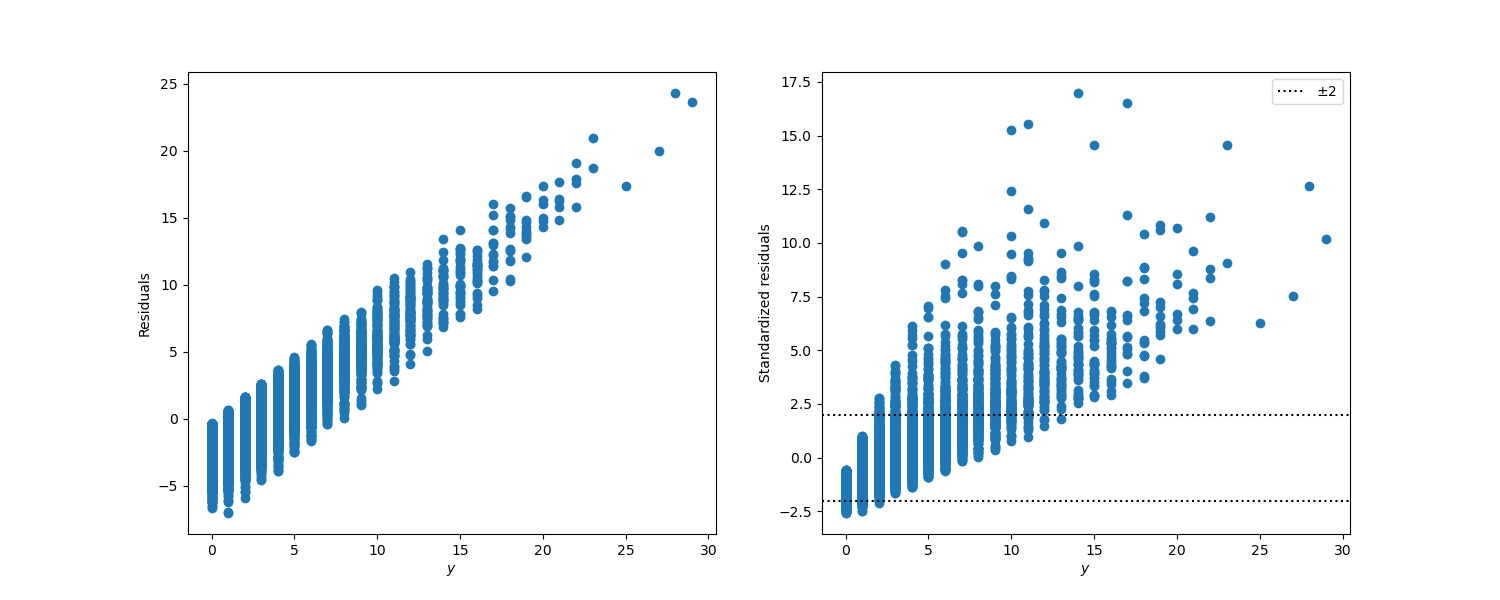

In [109]:
f, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].scatter(df1['num_accidents'], results_poisson1.resid_response)
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].scatter(df1['num_accidents'], results_poisson1.resid_pearson)
axes[1].axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
axes[1].axhline(y=+2, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

In [110]:
RESP1 = np.array(results_poisson1.resid_pearson)
(RESP1<-2).sum() , (RESP1>2).sum()

(249, 1226)

In [111]:
RESP1.shape[0]

10000

In [112]:
(249+1226)/10000

0.1475

#### We can see that only 85% of the residuals fall within the ±2 range of standard deviations

### Third Check :

In [113]:
R = results_poisson1.pearson_chi2 / results_poisson1.df_resid
print(R) 

3.3927199132930674


#### We have here an overdispersion !! 

### Forth Check : 

In [114]:
from scipy.stats import chi2
df_resid = results_poisson1.df_resid
p_value = 1 - chi2.cdf(results_poisson1.pearson_chi2, df_resid)
p_value

0.0

#### We can say that the assumption that the variable follows a Poisson distribution does not hold because we got a value smaller than 0.05.
---

# Q5

#### The main assumption in Poisson regression is that the mean is equal to the variance. When we check if 95% of the errors are within ±2 standard deviations, we are examining how the variance changes across different values. If 95% or more of the errors fall within this range, it indicates that the variance of the errors is relatively stable and doesn’t change much. This suggests that the errors follow a Poisson distribution and supports the assumption that the mean and variance are equal.
---

# Q6

#### We're going to do this because we don't have many data points for each mean, and to check for variance, we need to see the spread of the data. It's not possible to assess the spread with only a few points, so we'll use a method called 'bucketing.' This involves dividing the data points into several regions, and for each region, we'll calculate the mean and variance.
---

# Q7

In [115]:
df1.head()

,Intercept,age,safety_guidence_score,factory__c,chemical__c,time_in_factory,num_accidents,avg_accidents_per_year,Calgery,Montreal,Saskatoon,Vancouver,Sulfuric_Acid
0,1.0,44,0,Toronto,Sulfuric_Acid,1,0,0.00,0,0,0,0,1
1,1.0,35,4,Vancouver,Sulfuric_Acid,3,6,2.00,0,0,0,1,1
2,1.0,24,10,Toronto,Sulfuric_Acid,3,0,0.00,0,0,0,0,1
3,1.0,36,2,Vancouver,Sulfuric_Acid,8,2,0.25,0,0,0,1,1
4,1.0,29,8,Toronto,Sulfuric_Acid,5,0,0.00,0,0,0,0,1


In [116]:
from statsmodels.discrete.discrete_model import NegativeBinomial
X = df1[['Intercept', 'age', 'safety_guidence_score', 'Calgery', 'Montreal', 'Saskatoon', 'Vancouver', 'Sulfuric_Acid']]
y = df1['num_accidents']
nb = NegativeBinomial(
    y,
    X,
    offset=np.log(df1["time_in_factory"].values),
)
result = nb.fit()
print(pd.DataFrame(result.params).loc['alpha',:])

Optimization terminated successfully.
         Current function value: 2.083050
         Iterations: 31
         Function evaluations: 39
         Gradient evaluations: 39
0    0.759349
Name: alpha, dtype: float64


In [117]:
alpha = 0.759349
model_NB = sm.GLM(
    y,
    X,
    offset=np.log(df1["time_in_factory"]),
    family=sm.families.NegativeBinomial(alpha=alpha),
)
result_NB = model_NB.fit()
print(result_NB.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_accidents   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9992
Model Family:        NegativeBinomial   Df Model:                            7
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20830.
Date:                Mon, 12 Aug 2024   Deviance:                       11115.
Time:                        22:19:26   Pearson chi2:                 1.26e+04
No. Iterations:                     6   Pseudo R-squ. (CS):            0.03216
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept                -0.09

### As we can see there are non-significant variables and we need to drop them.

### So the new regresion will be :

In [118]:
X = df1[['age', 'safety_guidence_score', 'Vancouver']]
y = df1['num_accidents']
nb = NegativeBinomial(
    y,
    X,
    offset=np.log(df1["time_in_factory"].values),
)
result = nb.fit()
print(pd.DataFrame(result.params).loc['alpha',:])

Optimization terminated successfully.
         Current function value: 2.083263
         Iterations: 12
         Function evaluations: 20
         Gradient evaluations: 20
0    0.760043
Name: alpha, dtype: float64


In [119]:
alpha = 0.760043
model_NB = sm.GLM(
    y,
    X,
    offset=np.log(df1["time_in_factory"]),
    family=sm.families.NegativeBinomial(alpha=alpha),
)
result_NB2 = model_NB.fit()
print(result_NB2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_accidents   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9997
Model Family:        NegativeBinomial   Df Model:                            2
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20833.
Date:                Mon, 12 Aug 2024   Deviance:                       11114.
Time:                        22:19:26   Pearson chi2:                 1.26e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.03173
Covariance Type:            nonrobust                                         
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
age                      -0.02

### We can see that the 'safety_guidence_score' is non-significant aswell.

In [120]:
X = df1[['age', 'Vancouver']]
y = df1['num_accidents']
nb = NegativeBinomial(
    y,
    X,
    offset=np.log(df1["time_in_factory"].values),
)
result = nb.fit()
print(pd.DataFrame(result.params).loc['alpha',:])

Optimization terminated successfully.
         Current function value: 2.083355
         Iterations: 10
         Function evaluations: 17
         Gradient evaluations: 17
0    0.760563
Name: alpha, dtype: float64


In [121]:
alpha = 0.760563
model_NB = sm.GLM(
    y,
    X,
    offset=np.log(df1["time_in_factory"]),
    family=sm.families.NegativeBinomial(alpha=alpha),
)
result_NB3 = model_NB.fit()
print(result_NB3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:          num_accidents   No. Observations:                10000
Model:                            GLM   Df Residuals:                     9998
Model Family:        NegativeBinomial   Df Model:                            1
Link Function:                    Log   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -20834.
Date:                Mon, 12 Aug 2024   Deviance:                       11112.
Time:                        22:19:27   Pearson chi2:                 1.26e+04
No. Iterations:                     5   Pseudo R-squ. (CS):            0.03153
Covariance Type:            nonrobust                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
age           -0.0205      0.000    -53.958      0.0

### Now we checking if 95% of the errors are within ±2 standard deviations.

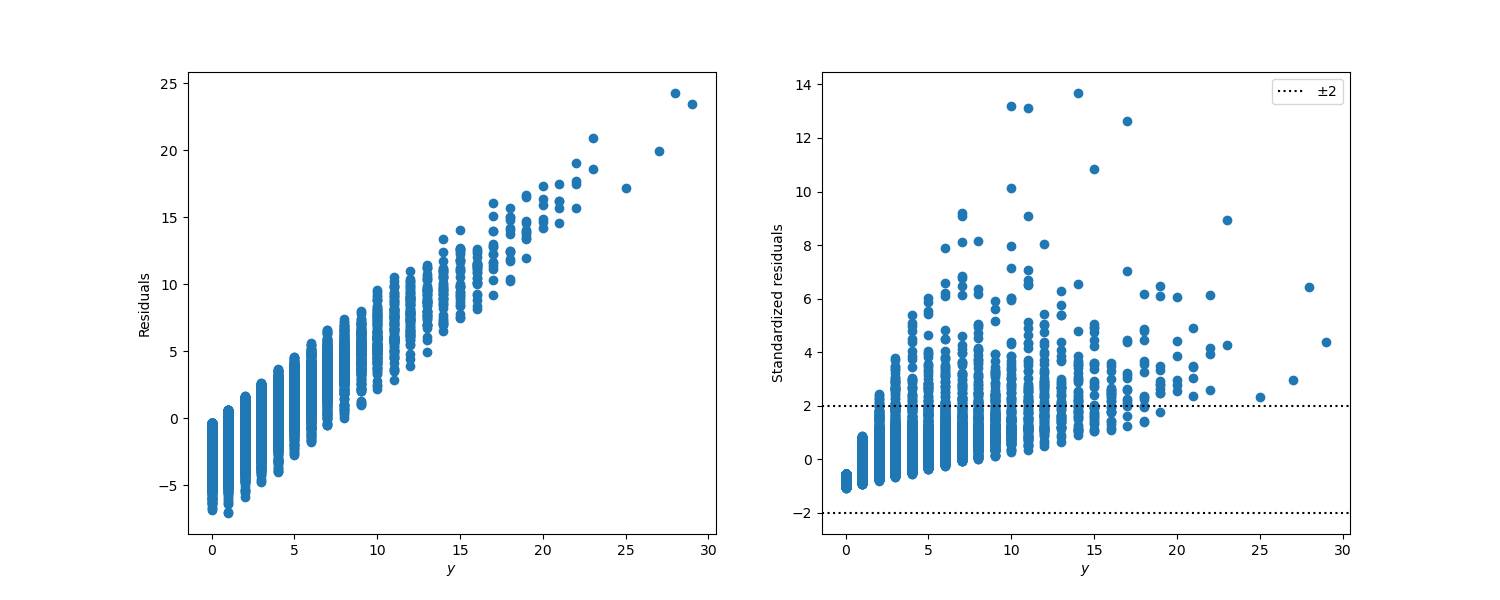

In [122]:
f, axes = plt.subplots(1, 2, figsize=(15, 6))
axes[0].plot(y, result_NB.resid_response, 'o')
axes[0].set_ylabel("Residuals")
axes[0].set_xlabel("$y$")
axes[1].plot(y, result_NB.resid_pearson, 'o')
axes[1].axhline(y=-2, linestyle=':', color='black', label='$\pm 2$')
axes[1].axhline(y=+2, linestyle=':', color='black')
axes[1].set_ylabel("Standardized residuals")
axes[1].set_xlabel("$y$")
plt.legend()
plt.show()

In [123]:
RESP2 = np.array(result_NB.resid_pearson)
(RESP2<-2).sum() , (RESP2>2).sum()

(0, 535)

In [124]:
RESP2.shape[0]

10000

In [125]:
535/10000

0.0535

### We can see that it's almost 95%, which is better than the Poisson regression. Therefore, we would prefer to use it, although it's still not perfect.


## IRR :

In [126]:
print("IRR[Vancouver] = ", np.exp(0.2667))

IRR[Vancouver] =  1.3056486929626985


#### Being in Vancouver compared to the baseline location increases the accident rate by about 30.56%.

# Q8

### Prediction when we not removing the non-significant variables

In [127]:
pred_df_bn = pd.DataFrame([])
pred_df_bn.loc[0,'Intercept'] = 1
pred_df_bn.loc[0,'age'] = 30
pred_df_bn.loc[0,'safety_guidence_score'] = 8
pred_df_bn.loc[0,'Calgery'] = 0
pred_df_bn.loc[0,'Montreal'] = 0
pred_df_bn.loc[0,'Saskatoon'] = 0
pred_df_bn.loc[0,'Vancouver'] = 0
pred_df_bn.loc[0,'Sulfuric_Acid'] = 0
pred_df_bn

,Intercept,age,safety_guidence_score,Calgery,Montreal,Saskatoon,Vancouver,Sulfuric_Acid
0,1.0,30.0,8.0,0.0,0.0,0.0,0.0,0.0


In [128]:
OurPrediction = 3 * result_NB.predict(pred_df_bn[['Intercept', 'age', 'safety_guidence_score', 'Calgery', 'Montreal', 'Saskatoon', 'Vancouver', 'Sulfuric_Acid']])
OurPrediction

0    1.649621
dtype: float64

### Prediction when we do removing the non-significant variables

In [129]:
pred_df_bn2 = pd.DataFrame([])
pred_df_bn2.loc[0,'age'] = 30
pred_df_bn2.loc[0,'safety_guidence_score'] = 8
pred_df_bn2.loc[0,'Vancouver'] = 0
pred_df_bn

,Intercept,age,safety_guidence_score,Calgery,Montreal,Saskatoon,Vancouver,Sulfuric_Acid
0,1.0,30.0,8.0,0.0,0.0,0.0,0.0,0.0


In [130]:
OurPrediction2 = 3 * result_NB2.predict(pred_df_bn[['age', 'safety_guidence_score', 'Vancouver']])
OurPrediction2

0    1.6524
dtype: float64

---

# Q9

### The meaning of the result we obtained is that the predicted number of accidents for a worker aged 30, who has worked for 3 years, with a safety guidance score of 8, at a factory in Toronto, and working with methane, is 1.649621.
---

# Q10

In [131]:
df1['age'].max(),df1['age'].min()

(49, 23)

In [132]:
ages = np.arange(23, 49) 
safety_guidence_scores = np.arange(1, 11)  
prediction_df = pd.DataFrame([(age, score) for age in ages for score in safety_guidence_scores], 
                    columns=['age', 'safety_guidence_score'])
prediction_df['Intercept'] = 1.0
prediction_df['Calgery'] = 0
prediction_df['Montreal'] = 0
prediction_df['Saskatoon'] = 0
prediction_df['Vancouver'] = 0
prediction_df['Sulfuric_Acid'] = 0

In [133]:
prediction_df['Prediction'] = 5 * result_NB.predict(prediction_df[['Intercept', 'age', 'safety_guidence_score', 'Calgery', 'Montreal', 'Saskatoon', 'Vancouver', 'Sulfuric_Acid']])

In [134]:
prediction_df.head()

,age,safety_guidence_score,Intercept,Calgery,Montreal,Saskatoon,Vancouver,Sulfuric_Acid,Prediction
0,23,1,1.0,0,0,0,0,0,2.990402
1,23,2,1.0,0,0,0,0,0,3.010387
2,23,3,1.0,0,0,0,0,0,3.030506
3,23,4,1.0,0,0,0,0,0,3.050758
4,23,5,1.0,0,0,0,0,0,3.071147


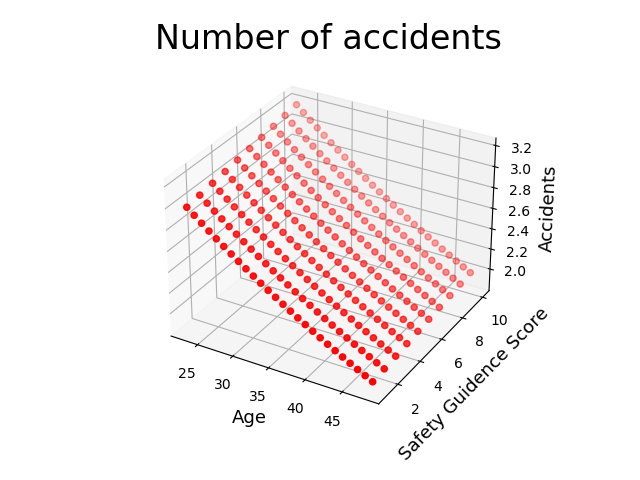

In [135]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
plt.title('Number of accidents' ,fontsize = 24)
ax.scatter(prediction_df['age'] , prediction_df['safety_guidence_score'], prediction_df['Prediction'] , c='r', marker='o')
ax.set_xlabel('Age',fontsize = 13)
ax.set_ylabel('Safety Guidence Score',fontsize = 13)
ax.set_zlabel('Accidents',fontsize = 13)
plt.show()

---

# Q11

### There are a few key differences between linear regression and Poisson regression. In linear regression, the support will be any number from negative infinity to positive infinity, whereas in Poisson regression, the support will be a non-negative integer (from 0 to infinity).
### In any regression model, we are predicting the expected value (or mean) of the dependent variable based on the values of the independent variables. We also assume that the true values of the dependent variable are distributed around this mean according to the distribution that matches the type of regression we are using.
### Linear regression uses the method of OLS (Ordinary Least Squares) to estimate the parameters, while Poisson regression uses 'Maximum Likelihood' estimation .
### We prefer to use linear regression when we have continuous data, not binary (0 or 1) data like in logistic regression, and we want to estimate some specific quantity. In general, linear regression is simpler and faster, but it requires certain assumptions to be met, including:
### 1. Linearity: The relationship between the variables is linear.
### 2. Homoscedasticity: The variance of the errors is constant across all levels of the independent variables.
### 3. Normality: The errors (or residuals) are normally distributed.